https://www.kaggle.com/mjamilmoughal/fruits-with-colors-dataset/version/1#fruit_data_with_colors.txt

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for plotting and visualozing data
import mglearn
# Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns
%matplotlib inline

In [37]:
fruits = pd.read_table('Datasets/fruit_data_with_colors.txt')
#checking first five rows of our dataset
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [38]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
#------------------------------------------
# The zip() function take iterables (can be zero or more), makes iterator that aggregates elements based on
#the iterables passed, and returns an iterator of tuples
#------------------------------------------
#numpy.unique --> Find the unique elements of an array
predct = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
predct

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

orange      19
apple       19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64


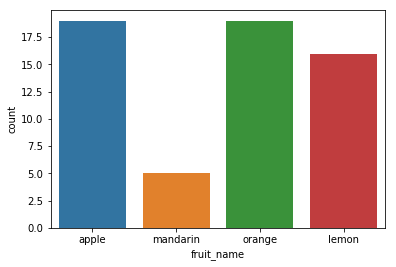

In [39]:
#checking how many unique fruit names are present in the dataset
print(fruits['fruit_name'].value_counts())

sns.countplot(fruits['fruit_name'],label="Count")
plt.show()

   fruit_label fruit_name fruit_subtype  mass  width  height  color_score
0            1      apple  granny_smith   192    8.4     7.3         0.55
1            1      apple  granny_smith   180    8.0     6.8         0.59
2            1      apple  granny_smith   176    7.4     7.2         0.60
8            1      apple      braeburn   178    7.1     7.8         0.92
9            1      apple      braeburn   172    7.4     7.0         0.89


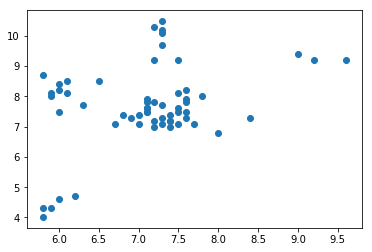

In [40]:
apple_data = fruits[fruits['fruit_name']=='apple']
print (apple_data.head())
plt.scatter(fruits['width'],fruits['height'])

In [41]:
from sklearn.model_selection import train_test_split
X = fruits[['mass','width','height','color_score']]
Y = fruits['fruit_label']
X_train,X_test,y_train,y_test = train_test_split(X,Y,random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (44, 4)
y_train shape: (44,)
X_test shape: (15, 4)
y_test shape: (15,)


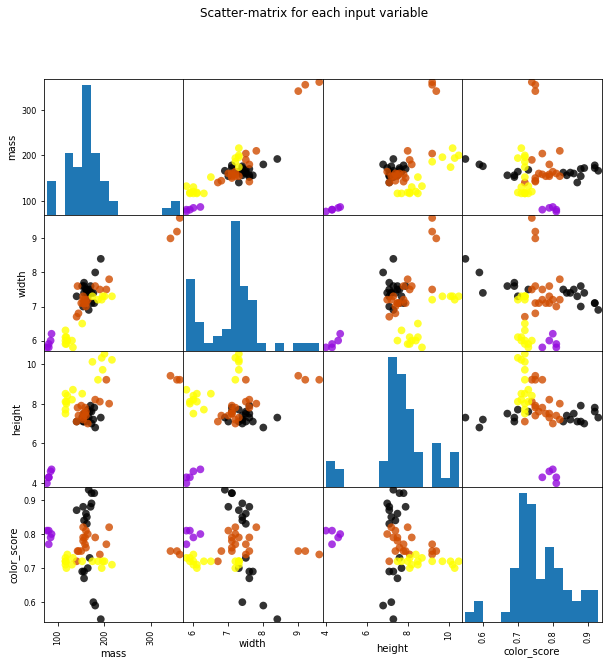

In [42]:
from matplotlib import cm

feature_names = ['mass', 'width', 'height', 'color_score']
X = fruits[feature_names]
y = fruits['fruit_label']

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s=60,alpha=.8, hist_kwds={'bins':15}, figsize=(10,10), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('fruits_scatter_matrix')

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [3 1 4 3 1 1 3 3 3 3 2 3 3 1 1]
Test set score: 0.60


In [45]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.60


In [49]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)
print("Test set score: {:.2f}".format(np.mean(y_pred == y_test)))

Test set predictions:
 [3 1 4 3 1 1 3 3 3 3 2 3 3 1 1]
Test set score: 0.60
